## Module 7 - Network Practice

We will see how to create network and tree visualizations using igraph and networkD3. Here are some references:

- [igraph manual pages](http://igraph.org/r/doc/)
- [igraph reference](https://cran.r-project.org/web/packages/igraph/igraph.pdf)
- [networkD3 reference](https://cran.r-project.org/web/packages/networkD3/networkD3.pdf)
- [network data sources](http://www-personal.umich.edu/~mejn/netdata/)

Let's start with a simple network.


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



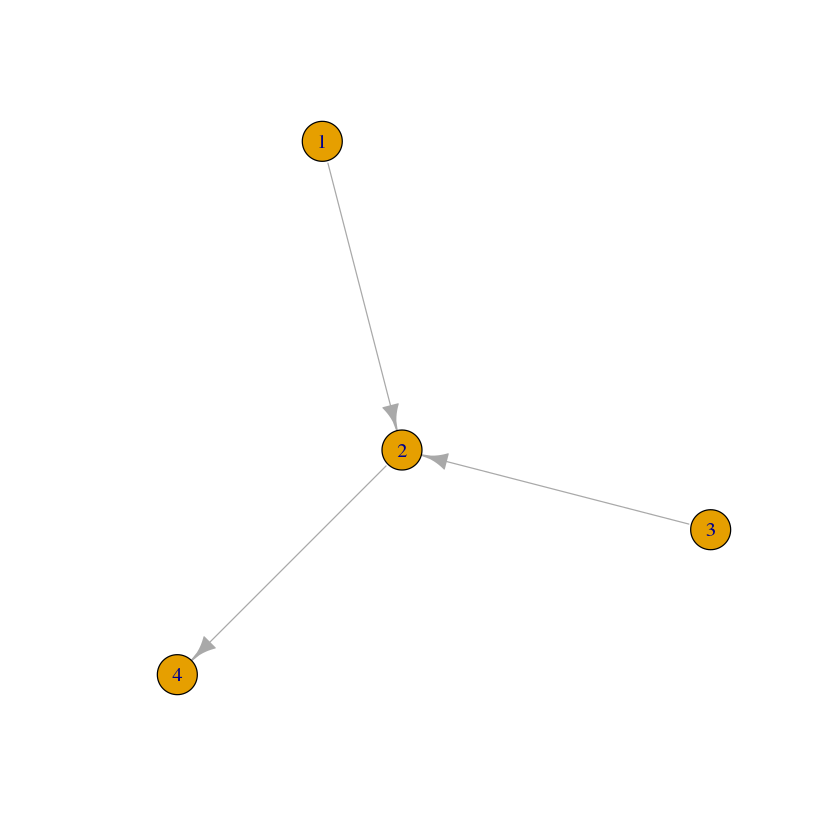

In [1]:
library(igraph)

# we can create a graph by giving a list of edges that are represented as vertex pairs. 
edges <- c(1,2, 3,2, 2,4)
# now convert it to a directed graph
g<-graph(edges, n=max(edges), directed=TRUE)

# there are 3 pairs, so there will be three edges 
plot(g)

In [2]:
# We can find out some statistics about a graph

# vertex count
vcount(g)

# edge count
ecount(g)

# neighbors of the first vertex 
neighbors(g, V(g)[1], mode = 1)

# statistics about neighbors
incident(g,V(g)[2], mode=c("all", "out", "in", "total"))

# are these vertices connected ? 
are.connected(g, V(g)[1], V(g)[3])

# get a list of graph edges 
get.edgelist(g)

# List of vertices 
V(g)


[1] 4

[1] 3

+ 1/4 vertex:
[1] 2

+ 3/3 edges:
[1] 2->4 1->2 3->2

[1] FALSE

1,2
3,2
2,4


+ 4/4 vertices:
[1] 1 2 3 4

V1,V2
A,B
A,G
A,Y
G,Y


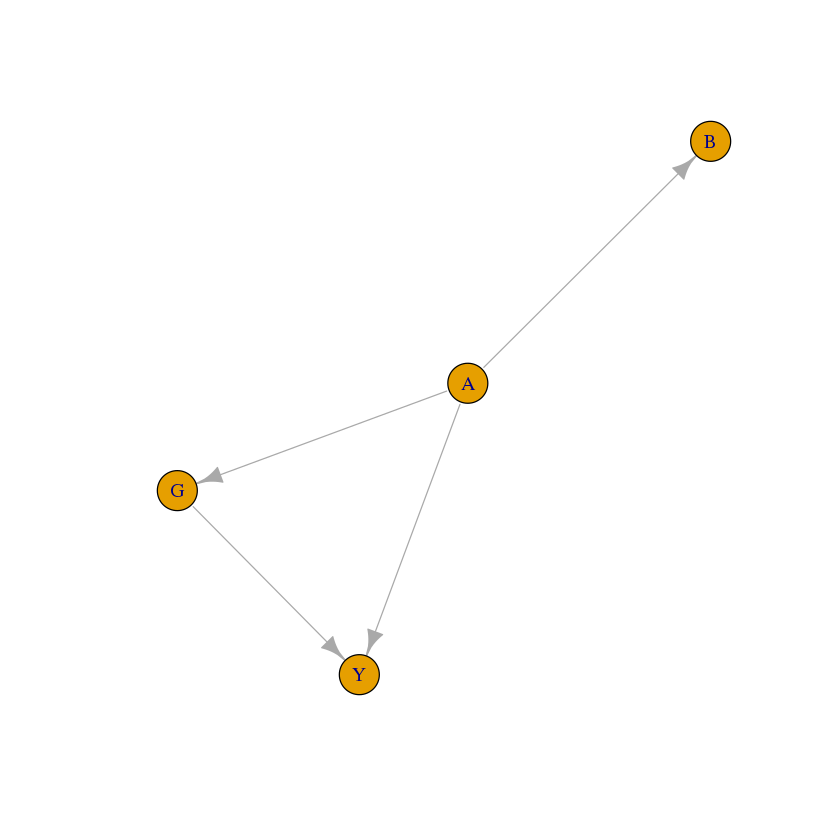

In [3]:
# We can read an edge list from a text file.
# This is the file content:
# A,B
# A,G
# A,Y
# G,Y

t <-read.csv("../../../datasets/networks/graph1.txt", header=FALSE)
head(t)
g2 <- graph.data.frame(t)
plot(g2)

In [4]:
# We can also read an adjacency matrix from a text file. 
# This is a sample row in the file showing the connectivity of 
# the first vertex to the other vertices:

# 0 1 1 1 0 0 0 0 1 0 0 1 0

adj_matrix <- as.matrix(read.table("../../../datasets/networks/SAcountries.txt",header=FALSE, sep=" "))
adj_matrix

# We also need names; the above matrix data represents neighborhood relationship 
# between the countries in South America. 
# Let's read the names from a different file
SAnames <- read.csv("../../../datasets/networks/SAcountrylist.txt", header=FALSE)
head(SAnames)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,1,1,1,0,0,0,0,1,0,0,1,0
1,0,1,1,0,0,0,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,0,0,0,0,1,0,0,0
0,0,1,0,0,1,0,0,0,1,0,0,1
0,0,0,0,1,0,0,0,0,1,0,0,0
0,0,1,0,0,0,0,0,0,0,1,0,0
0,0,1,0,0,0,0,0,0,0,1,0,1
1,1,1,0,0,0,0,0,0,0,0,0,0
0,1,1,1,1,1,0,0,0,0,0,0,0


V1
Argentina
Bolivia
Brazil
Chile
Colombia
Ecuador


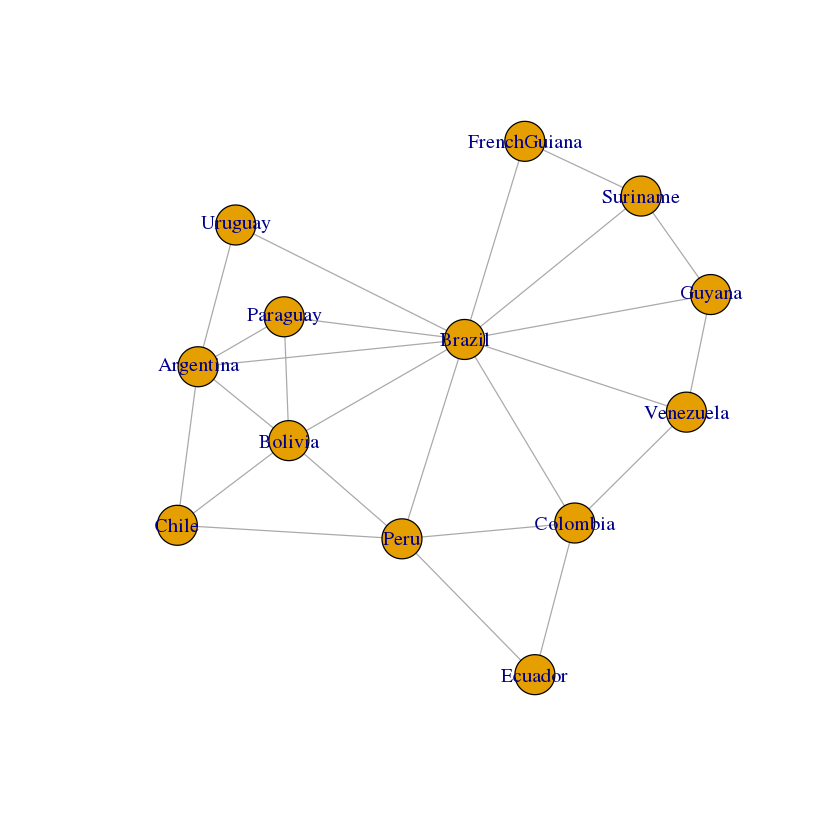

In [5]:
# Let's build an undirected simple (nonweighted) graph from the above matrix
gSA <-  graph_from_adjacency_matrix(adj_matrix, weighted = NULL,  mode = "undirected")

# remove loops
gSA <- simplify(gSA)
# set labels and degrees of vertices
gSA <- set_vertex_attr(gSA, "label", value= as.vector(SAnames$V1))
# create an attribute to hold degree for each vertex
V(gSA)$degree <- degree(gSA)
# do a force-directed layout 
layout1 <- layout.fruchterman.reingold(gSA)
# draw the newtwork 
plot(gSA, layout=layout1)

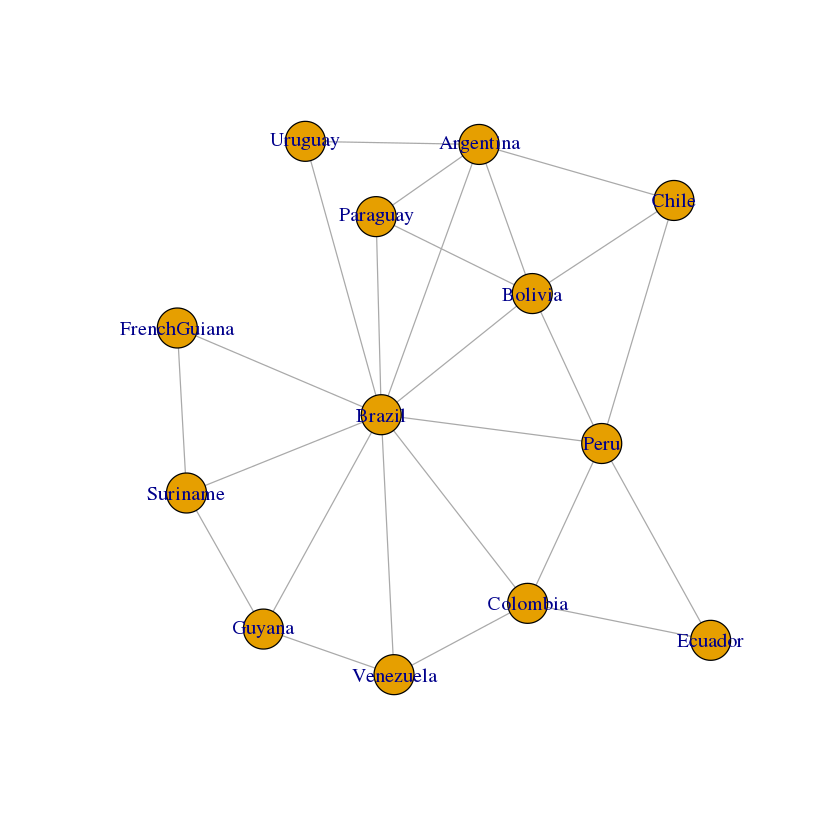

In [6]:
# another layout 
plot(gSA, layout=layout.kamada.kawai)


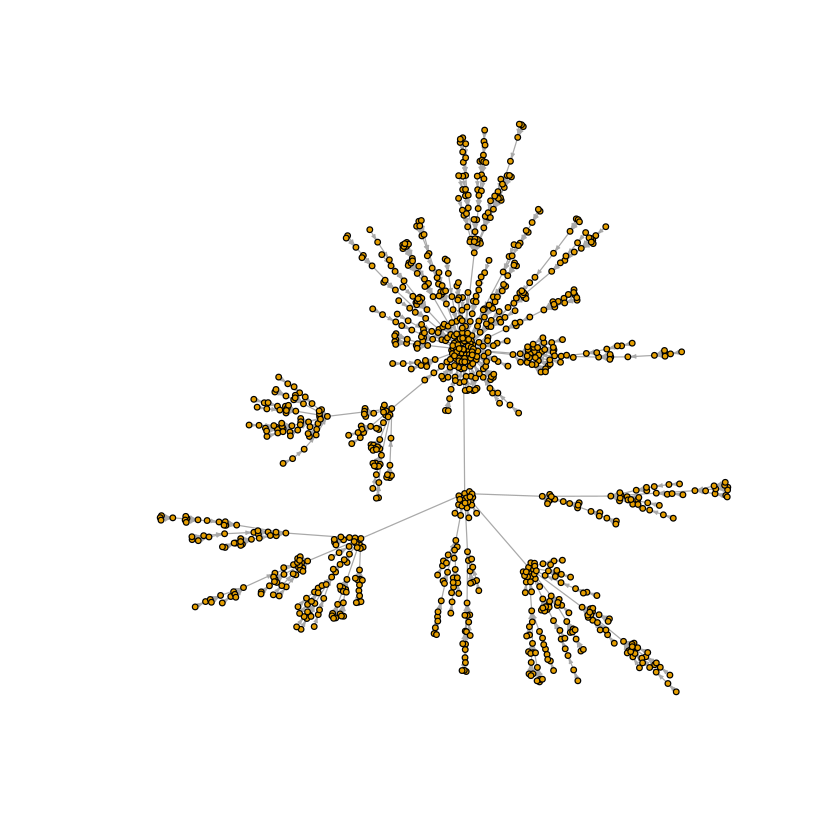

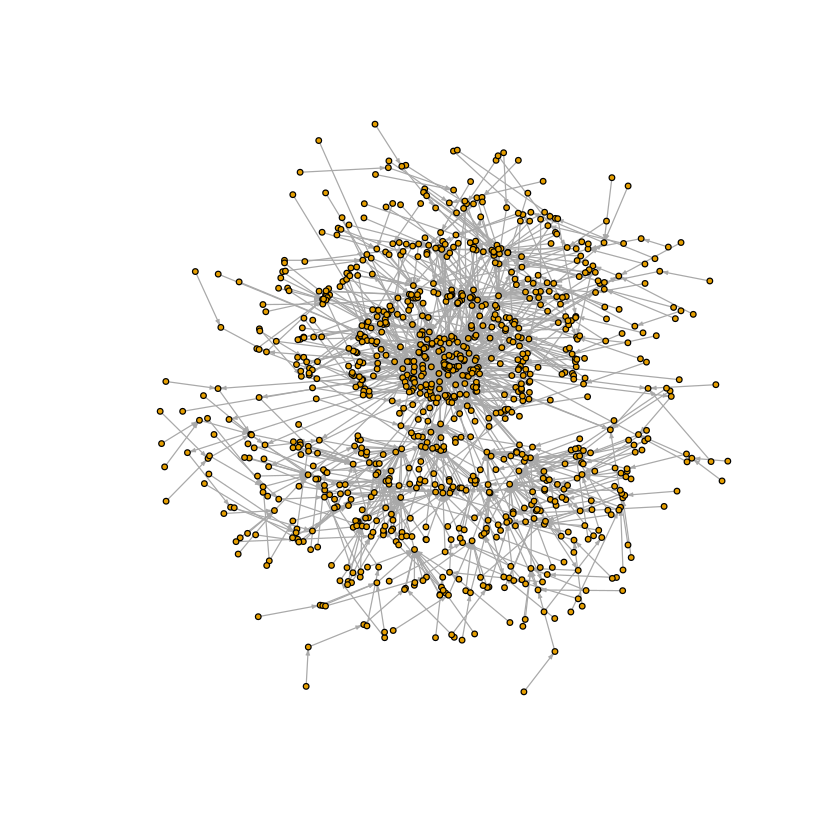

In [7]:
# this is an example of a more complicated graph, it'll take a while to draw
gb <- barabasi.game(1000, power=1)
l1 <- layout.fruchterman.reingold(gb)
l2 <- layout.kamada.kawai
plot(gb, layout=l1, vertex.size=2, vertex.label=NA, edge.arrow.size=.2)
plot(gb, layout=l2, vertex.size=2, vertex.label=NA, edge.arrow.size=.2)

Let's do similar layouts in networkD3. This library produces interactive graphs, you can click on a node and move it. 

In [8]:
library(networkD3)

# Create edge data
src <- c("A", "A", "A", "A",
        "B", "B", "C", "C", "D")
target <- c("B", "C", "D", "J",
            "E", "F", "G", "H", "I")
networkData <- data.frame(src, target)

# Plot
simpleNetwork(networkData, height=300)

HTML widgets cannot be represented in plain text (need html)

In [9]:
# We can also convert the igraph graphs to D3 
gSA_d3 <- igraph_to_networkD3(gSA)

# Create force directed network plot - you can zoom into this graph with mouse 
forceNetwork(Links = gSA_d3$links, Nodes = gSA_d3$nodes, Source = 'source', Target = 'target', 
             NodeID = 'name', Group = 'name', height=500, zoom=TRUE)

HTML widgets cannot be represented in plain text (need html)

In [10]:
# This is the Les Miserables data set that comes with the library 
data(MisLinks)
data(MisNodes)

# Plot
forceNetwork(Links = MisLinks, Nodes = MisNodes,
            Source = "source", Target = "target",
            Value = "value", NodeID = "name",
            Group = "group", opacity = 0.8, height=600)

HTML widgets cannot be represented in plain text (need html)

In [11]:
# And this is an example of a radial network 
URL <- paste0("https://cdn.rawgit.com/christophergandrud/networkD3/","master/JSONdata//flare.json")

## Convert to list format
Flare <- jsonlite::fromJSON(URL, simplifyDataFrame = FALSE)

# Use subset of data for more readable diagram
Flare$children = Flare$children[1:3]

radialNetwork(List = Flare, fontSize = 10, opacity = 1, height=600)

HTML widgets cannot be represented in plain text (need html)

In [12]:
#We can also read graphs in GML format. 
# This example contains an undirected social network of frequent
# associations between 62 dolphins in a community living off Doubtful Sound,
# New Zealand, as compiled by Lusseau et al. (2003). 
gml_data <- read.graph("../../../datasets/networks/dolphins.gml", format=c("gml"))

gml_data <- simplify(gml_data)

dol <- igraph_to_networkD3(gml_data)

forceNetwork(Links = dol$links, Nodes = dol$nodes, NodeID = "name", Group = "name", height=600, zoom=TRUE)


HTML widgets cannot be represented in plain text (need html)

In [14]:
head(gml_data)

6 x 62 sparse Matrix of class "dgCMatrix"
                                                                              
[1,] . . . . . . . . . . 1 . . . 1 1 . . . . . . . . . . . . . . . . . . . . .
[2,] . . . . . . . . . . . . . . . . . 1 . 1 . . . . . . 1 1 1 . . . . . . . 1
[3,] . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . .
[4,] . . . . . . . . 1 . . . . . 1 . . . . . . . . . . . . . . . . . . . . . .
[5,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[6,] . . . . . . . . . 1 . . . 1 . . . . . . . . . . . . . . . . . . . . . . .
                                                      
[1,] . . . 1 . 1 . . . . 1 . . . . . . . . . . . . . .
[2,] . . . . 1 . . . . . . . . . . . . 1 . . . . . . .
[3,] . . . . . 1 . 1 . . . . . . . . . . . . . . . . 1
[4,] . . . . . . . . . . . . . . . . . . . . . . 1 . .
[5,] . . . . . . . . . . . . . . 1 . . . . . . . . . .
[6,] . . . . . . . . . . . . . . . . . . . 1 1 . . . .